In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []

#identify the nearest city for each latitude and longitude combinations
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

612

In [6]:
#import the requests library
import requests

#import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Import the datetime module from the datetime library
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the uRL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}") 
    
    #Add 1 to the record count
    record_count += 1
    
#run an API request fro each of the cities
    try:
        #parse te JSON and retrive data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
#Indicate that the Data Loading is complete
print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | longlac
City not found. Skipping...
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | pacific grove
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | maghama
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | tulun
Processing Record 20 of Set 1 | sorgun
Processing Record 21 of Set 1 | hot springs
P

Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | ruian
City not found. Skipping...
Processing Record 41 of Set 4 | ahipara
Processing Record 42 of Set 4 | nouadhibou
Processing Record 43 of Set 4 | la ronge
Processing Record 44 of Set 4 | kruisfontein
Processing Record 45 of Set 4 | trzebiatow
Processing Record 46 of Set 4 | richards bay
Processing Record 47 of Set 4 | coquimbo
Processing Record 48 of Set 4 | praia da vitoria
Processing Record 49 of Set 4 | west des moines
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | rocha
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | caxito
Processing Record 4 of Set 5 | pimentel
Processing Record 5 of Set 5 | guaiba
Processing Record 6 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 5 | nova olinda do norte
Processing Record 8 of Set 5 | zlitan
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | redmond
Processing Record 11

Processing Record 24 of Set 8 | husavik
Processing Record 25 of Set 8 | itarema
Processing Record 26 of Set 8 | basco
Processing Record 27 of Set 8 | riberalta
Processing Record 28 of Set 8 | kyzyl-suu
Processing Record 29 of Set 8 | bocaranga
City not found. Skipping...
Processing Record 30 of Set 8 | sao joao da barra
Processing Record 31 of Set 8 | amderma
City not found. Skipping...
Processing Record 32 of Set 8 | pampa
Processing Record 33 of Set 8 | ambatofinandrahana
Processing Record 34 of Set 8 | raghunathpur
Processing Record 35 of Set 8 | sampit
Processing Record 36 of Set 8 | slobodskoy
Processing Record 37 of Set 8 | emerald
Processing Record 38 of Set 8 | kijang
Processing Record 39 of Set 8 | new norfolk
Processing Record 40 of Set 8 | severo-yeniseyskiy
Processing Record 41 of Set 8 | cap-aux-meules
Processing Record 42 of Set 8 | villazon
Processing Record 43 of Set 8 | dali
Processing Record 44 of Set 8 | dubbo
Processing Record 45 of Set 8 | namibe
Processing Record 

Processing Record 13 of Set 12 | nizhniy kuranakh
Processing Record 14 of Set 12 | kabansk
Processing Record 15 of Set 12 | porto novo
Processing Record 16 of Set 12 | tromso
Processing Record 17 of Set 12 | trinidad
Processing Record 18 of Set 12 | kultuk
Processing Record 19 of Set 12 | catamarca
Processing Record 20 of Set 12 | viedma
Processing Record 21 of Set 12 | najran
Processing Record 22 of Set 12 | christchurch
Processing Record 23 of Set 12 | alugan
Processing Record 24 of Set 12 | portel
Processing Record 25 of Set 12 | ishigaki
Processing Record 26 of Set 12 | isangel
Processing Record 27 of Set 12 | yumen
Processing Record 28 of Set 12 | rio grande
Processing Record 29 of Set 12 | oranjestad
Processing Record 30 of Set 12 | verkhnyaya inta
Processing Record 31 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 32 of Set 12 | the valley
Processing Record 33 of Set 12 | buala
Processing Record 34 of Set 12 | jelgava
Processing Record 35 of Set 12 | joroch

In [10]:
len(city_data)

563

In [11]:
#convert the array of dictionaries to a pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tura,25.5198,90.2201,77.86,20,0,3.49,IN,2021-03-04 03:16:25
1,Torbay,47.6666,-52.7314,24.01,93,90,21.85,CA,2021-03-04 03:19:23
2,Pacific Grove,36.6177,-121.9166,52.00,82,40,5.75,US,2021-03-04 03:21:37
3,Puerto Ayora,-0.7393,-90.3518,78.01,95,64,3.27,EC,2021-03-04 03:19:15
4,Butaritari,3.0707,172.7902,81.48,82,27,17.72,KI,2021-03-04 03:19:16
5,Bluff,-46.6000,168.3333,64.00,53,29,3.00,NZ,2021-03-04 03:19:22
6,Faanui,-16.4833,-151.7500,82.85,73,100,7.81,PF,2021-03-04 03:19:50
7,Albany,42.6001,-73.9662,37.40,69,90,8.05,US,2021-03-04 03:15:44
8,Kodiak,57.7900,-152.4072,35.60,55,1,13.80,US,2021-03-04 03:19:20
9,Atuona,-9.8000,-139.0333,80.06,72,56,8.50,PF,2021-03-04 03:17:54


In [12]:
#reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tura,IN,2021-03-04 03:16:25,25.5198,90.2201,77.86,20,0,3.49
1,Torbay,CA,2021-03-04 03:19:23,47.6666,-52.7314,24.01,93,90,21.85
2,Pacific Grove,US,2021-03-04 03:21:37,36.6177,-121.9166,52.00,82,40,5.75
3,Puerto Ayora,EC,2021-03-04 03:19:15,-0.7393,-90.3518,78.01,95,64,3.27
4,Butaritari,KI,2021-03-04 03:19:16,3.0707,172.7902,81.48,82,27,17.72
5,Bluff,NZ,2021-03-04 03:19:22,-46.6000,168.3333,64.00,53,29,3.00
6,Faanui,PF,2021-03-04 03:19:50,-16.4833,-151.7500,82.85,73,100,7.81
7,Albany,US,2021-03-04 03:15:44,42.6001,-73.9662,37.40,69,90,8.05
8,Kodiak,US,2021-03-04 03:19:20,57.7900,-152.4072,35.60,55,1,13.80
9,Atuona,PF,2021-03-04 03:17:54,-9.8000,-139.0333,80.06,72,56,8.50


In [13]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

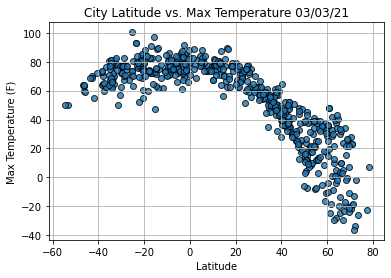

In [18]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temp,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

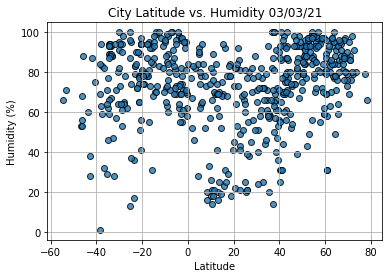

In [19]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

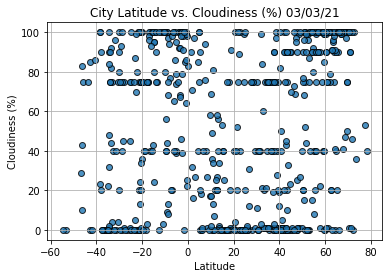

In [20]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()